In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#!pip install missingno

In [106]:
df = pd.read_csv('googleplaystore.csv')

## Data cleaning


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [108]:
#duplicate
df.duplicated().sum()


483

In [109]:
#drop duplicates   
df.drop_duplicates(inplace=True, ignore_index=True)

In [110]:
df = df[df.Category != '1.9']

In [111]:
#missing data
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

<AxesSubplot:>

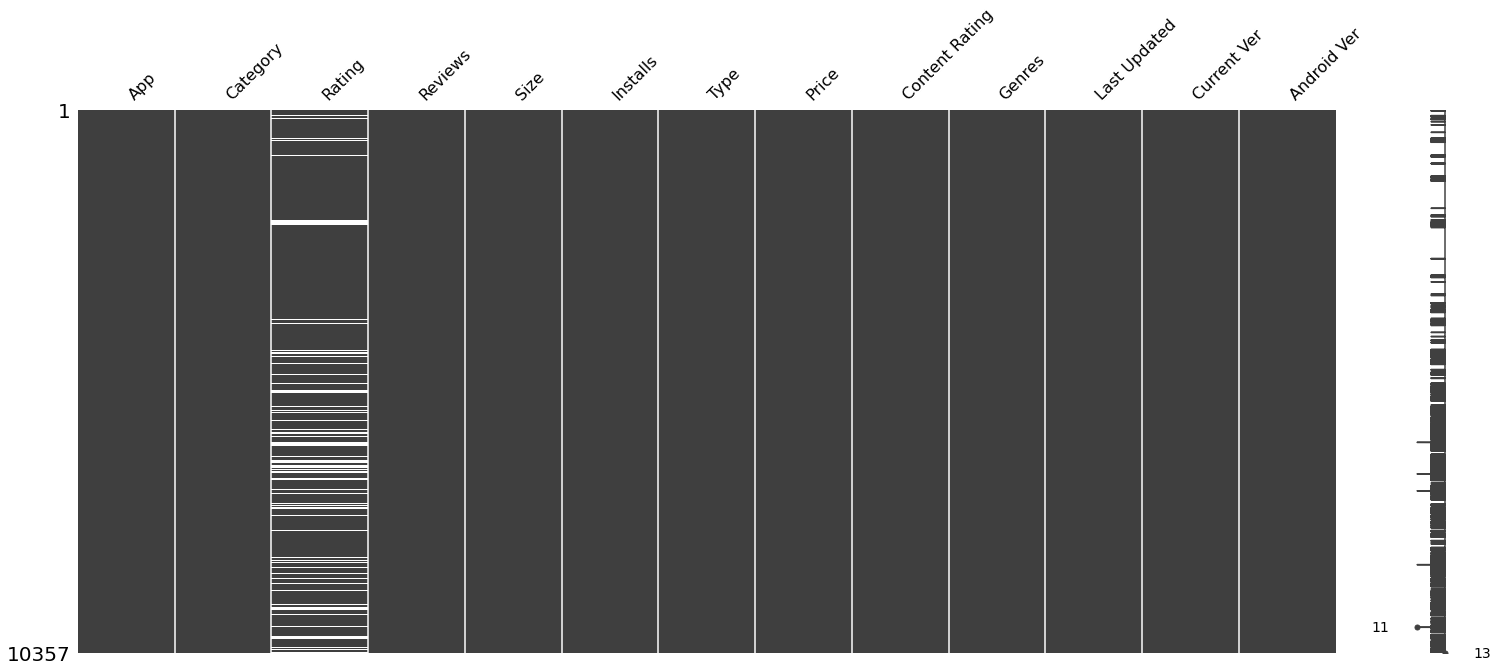

In [112]:
# Visualise the missing ones
msno.matrix(df)


In [113]:
df.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [114]:
df["Price"]=df['Price'].str.replace('$','').astype(float)

/var/folders/9k/znvz547n28q5p5rm8qtkt5w80000gn/T/ipykernel_12919/4226941027.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"]=df['Price'].str.replace('$','').astype(float)


In [115]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype(float)


/var/folders/9k/znvz547n28q5p5rm8qtkt5w80000gn/T/ipykernel_12919/2201598346.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype(float)


In [116]:
df.Rating.describe()

count    8892.000000
mean        4.187877
std         0.522377
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [117]:
df[~df.Reviews.str.isnumeric()]
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [118]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Model

In [80]:
df.drop_duplicates(inplace=True, ignore_index=True)
df = df[df.Category != '1.9']
df=df.dropna()

In [81]:
df2=pd.get_dummies(df.Category,prefix='Category')

In [82]:
df= df.drop(columns=['Size','App', 'Category','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver'])

In [83]:
data = df.join(df2)

In [84]:
data['rate_classify'] = pd.Series(0)
for ind in data.index:
    if data['Rating'][ind]>=4.5:
        data['rate_classify'][ind]=1
    elif data['Rating'][ind]<4.5:
        data['rate_classify'][ind]=0
        
y = data.Rating
X=data.drop(['Rating','rate_classify'],axis=1)

/var/folders/9k/znvz547n28q5p5rm8qtkt5w80000gn/T/ipykernel_12919/3838590090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate_classify'][ind]=0
/var/folders/9k/znvz547n28q5p5rm8qtkt5w80000gn/T/ipykernel_12919/3838590090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate_classify'][ind]=1


In [85]:
X

,Reviews,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,159,10000.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,500000.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,5000000.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,50000000.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,100000.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,7,500.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10352,38,5000.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10353,4,100.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10355,114,1000.0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 
pd.DataFrame(X_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf).round(3)
print("RMSE using Random Forest: ", mse_rf)
feature_names=X.columns

RMSE using Random Forest:  0.27


Text(0.5, 0, 'Feature Importance (%)')

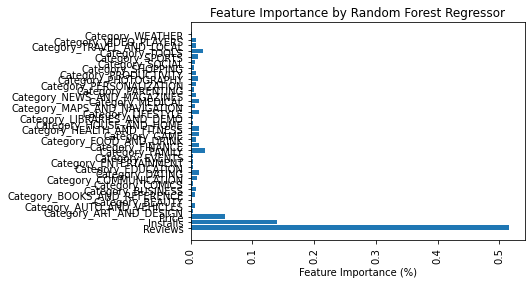

In [94]:
plt.barh(feature_names,rf.feature_importances_)
plt.xticks(rotation=90);
plt.title('Feature Importance by Random Forest Regressor')
plt.xlabel('Feature Importance (%)')

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import math

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

lr=LinearRegression()
lr.fit(X_train,y_train) 
lr
y_pred_lr = rf.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr).round(3)
print(mse_lr)

X_train_lr = sm.add_constant(X_train)

#fit linear regression model
model_lr = sm.OLS(y_train, X_train_lr).fit()

#view model summary
print(model_lr.summary())

0.268
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.770
Date:                Tue, 02 May 2023   Prob (F-statistic):           3.28e-31
Time:                        20:16:06   Log-Likelihood:                -5345.3
No. Observations:                7108   AIC:                         1.076e+04
Df Residuals:                    7072   BIC:                         1.101e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0686      0.009    463.957   

In [90]:
# Fit a Lasso regression model on the training data
from sklearn.linear_model import Ridge, Lasso, ElasticNet

alpha = 0.5 # Regularization parameter
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
elasticNet = ElasticNet(alpha=alpha)
elasticNet.fit(X_train, y_train)

# Predict on the test data and calculate the R-squared score
y_pred_rid = ridge.predict(X_test)
mse_rid = mean_squared_error(y_test, y_pred_rid).round(3)
y_pred_las = lasso.predict(X_test)
mse_las = mean_squared_error(y_test, y_pred_las).round(3)
y_pred_ela = ridge.predict(X_test)
mse_ela = mean_squared_error(y_test, y_pred_ela).round(3)
print('mean_squared_error score for Ridge:', mse_rid)
print('mean_squared_error score for Lasso:', mse_las)
print('mean_squared_error score for Elastic Net:', mse_ela)


mean_squared_error score for Ridge: 0.266
mean_squared_error score for Lasso: 0.275
mean_squared_error score for Elastic Net: 0.266


In [96]:
# Create a dataframe to store MSE values for different models
models_df = pd.DataFrame(columns=['Model', 'MSE'])
models_df = models_df.append({'Model': 'Random Forest', 'MSE': mse_rf}, ignore_index=True)
# Add more MSE values for different models
models_df = models_df.append({'Model': 'Linear Regression', 'MSE': mse_lr}, ignore_index=True)
models_df = models_df.append({'Model': 'Ridge Regression', 'MSE': mse_rid}, ignore_index=True)
models_df.sort_values("MSE")

,Model,MSE
2,Ridge Regression,0.266
1,Linear Regression,0.268
0,Random Forest,0.270


In [85]:
from  sklearn.linear_model import LogisticRegression
y_c=data['rate_classify'].values
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_c, stratify=y_c, test_size = 0.2, random_state = 42)

In [90]:
from  sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_c, y_train_c)
y_pred_c_log = logistic_regression.predict(X_test_c)
mse_c_log = mean_squared_error(y_test_c, y_pred_c_log).round(3)
mse_c_log
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(y_test_c, y_pred_c_log)
logit_accuracy

0.718785151856018

In [87]:
import statsmodels.api as sms
logit_model=sms.Logit(y_train_c,X_train_c).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.605475
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7108
Model:                          Logit   Df Residuals:                     7072
Method:                           MLE   Df Model:                           35
Date:                Tue, 02 May 2023   Pseudo R-squ.:                 0.03022
Time:                        18:50:39   Log-Likelihood:                -4303.7
converged:                       True   LL-Null:                       -4437.8
Covariance Type:            nonrobust   LLR p-value:                 9.446e-38
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Reviews                       9.914e-08   1.97e-08      5.029      0.000    6.05e-08    1.38e-07
Installs                      -1.93e-09   5.89e-10     -3.277      0.001   -3.08e-09   -7.76e-10
Price                           -0.0059      0.004     -1.632      0.103      -0.013       0.001
Category_ART_AND_DESIGN         -0.1479      0.273     -0.542      0.588      -0.683       0.387
Category_AUTO_AND_VEHICLES      -0.5981      0.265     -2.253      0.024      -1.118      -0.078
Category_BEAUTY                 -0.4304      0.356     -1.208      0.227      -1.129       0.268
Category_BOOKS_AND_REFERENCE     0.0111      0.173      0.064      0.949      -0.328       0.350
Category_BUSINESS               -0.9039      0.152     -5.957      0.000      -1.201      -0.606
Category_COMICS                 -0.5047      0.283     -1.781      0.075      -1.060       0.051
Category_COMMUNICATION          -1.8812      0.191     -9.864      0.000      -2.255      -1.507
Category_DATING                 -1.7832      0.248     -7.191      0.000      -2.269      -1.297
Category_EDUCATION              -0.4978      0.198     -2.510      0.012      -0.887      -0.109
Category_ENTERTAINMENT          -1.6674      0.292     -5.714      0.000      -2.239      -1.095
Category_EVENTS                 -0.1050      0.325     -0.323      0.747      -0.742       0.532
Category_FAMILY                 -0.7596      0.058    -13.083      0.000      -0.873      -0.646
Category_FINANCE                -0.7588      0.136     -5.563      0.000      -1.026      -0.491
Category_FOOD_AND_DRINK         -0.5754      0.225     -2.562      0.010      -1.016      -0.135
Category_GAME                   -0.6682      0.074     -9.075      0.000      -0.813      -0.524
Category_HEALTH_AND_FITNESS      0.1410      0.137      1.026      0.305      -0.128       0.410
Category_HOUSE_AND_HOME         -0.8051      0.292     -2.759      0.006      -1.377      -0.233
Category_LIBRARIES_AND_DEMO     -1.2124      0.343     -3.530      0.000      -1.886      -0.539
Category_LIFESTYLE              -0.6963      0.137     -5.086      0.000      -0.965      -0.428
Category_MAPS_AND_NAVIGATION    -1.3350      0.246     -5.435      0.000      -1.816      -0.854
Category_MEDICAL                -0.3676      0.129     -2.856      0.004      -0.620      -0.115
Category_NEWS_AND_MAGAZINES     -0.7308      0.164     -4.453      0.000      -1.052      -0.409
Category_PARENTING               0.0016      0.316      0.005      0.996      -0.618       0.621
Category_PERSONALIZATION        -0.4330      0.134     -3.242      0.001      -0.695      -0.171
Category_PHOTOGRAPHY            -0.9207      0.140     -6.570      0.000      -1.195      -0.646
Category_PRODUCTIVITY           -0.7712      0.134     -5.766      0.000      -1.033      -0.509
Category_SHOPPING               -0.7779      0.165     -4.707      0.000      -1.102      -0.454
Category_SOCIAL                 -0.8227 

In [227]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
rf = RandomForestClassifier()
rf.fit(X_train_c, y_train_c)
y_pred_c_rf = rf.predict(X_test_c)
rf_accuracy = accuracy_score(y_test_c, y_pred_c_rf)
rf_mse = mean_squared_error(y_test_c, y_pred_c_rf)
rf_r2 = r2_score(y_test_c, y_pred_c_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest MSE:", rf_mse)
print("Random Forest R-Square:", rf_r2)
print("Precision: ", precision_score(y_test_c, y_pred_c_rf))
print("Recall: ", recall_score(y_test_c, y_pred_c_rf))
print("F1 score: ", f1_score(y_test_c, y_pred_c_rf))

Random Forest Accuracy: 0.7007874015748031
Random Forest MSE: 0.2992125984251969
Random Forest R-Square: -0.3827979153418266
Precision:  0.5288640595903166
Recall:  0.5044404973357016
F1 score:  0.5163636363636364


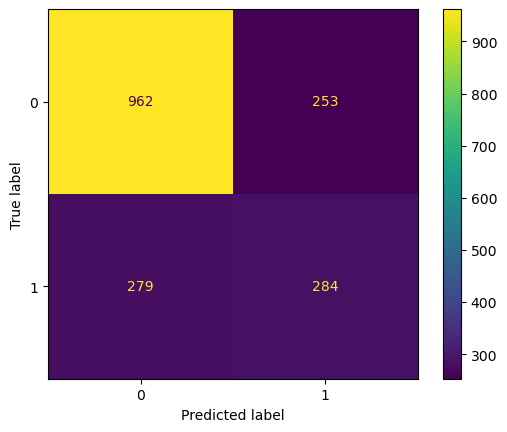

In [229]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
cf_rf=confusion_matrix(y_test_c, y_pred_c_rf)
ConfusionMatrixDisplay(confusion_matrix=cf_rf).plot()

## NLP

In [57]:
review = pd.read_csv('googleplaystore_user_reviews.csv')
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [58]:
review.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in review.Sentiment]
review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,0,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,0,0.25,0.288462
2,10 Best Foods for You,NaN,2,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,0,0.40,0.875000
4,10 Best Foods for You,Best idea us,0,1.00,0.300000
5,10 Best Foods for You,Best way,0,1.00,0.300000
6,10 Best Foods for You,Amazing,0,0.60,0.900000
7,10 Best Foods for You,NaN,2,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",2,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,2,0.00,0.000000


In [59]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/liangzhao/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/liangzhao/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liangzhao/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [60]:
review = review.dropna(subset=['Translated_Review'])


In [31]:
#removing stopwords, unnecessary characters, lemmatization,
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk as nlp


text_list=[]
for i in review.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",str(i))
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)
text_list[:10]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'it helpful site it help food get',
 'good you',
 'useful information the amount spelling error question validity information shared once fixed star given']

In [37]:
#bag of words
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
max_features=200000

cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names_out()


Most used words:  ['aborted' 'aborting' 'abortion' 'abou' 'abousolutely' 'abracadabra'
 'abroad' 'abrupt' 'abruptly' 'absence' 'absent' 'absolute' 'absolutely'
 'absolutly' 'absorbing' 'abstract' 'abstraction' 'absurd' 'abt' 'abu'
 'abundance' 'abundant' 'abundantly' 'abuse' 'abused' 'abuser' 'abusing'
 'abusive' 'abysmal' 'abyss' 'ac' 'aca' 'academia' 'acc' 'accasionly'
 'accelent' 'accelerate' 'acceleration' 'accent' 'accentuates' 'accept'
 'acceptable' 'acceptance' 'accepted' 'accepting' 'accepts' 'acces'
 'accesable' 'access' 'accessabilty']


In [49]:
#wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_freq = {}
word_list = [word for line in text_list for word in line.split()]
word_list = [word for word in word_list if len(word) >= 2]
stop_words = set(stopwords.words('english'))
word_list = [word for word in word_list if not word.lower() in stop_words]
for word in word_list:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1


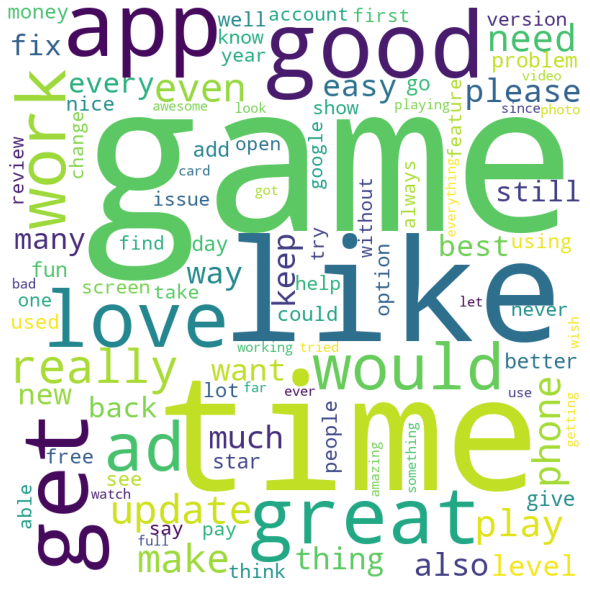

In [50]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(word_freq)

# plot the WordCloud object 
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [67]:
from collections import Counter
words_counts = Counter(word_list)
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_common_wordList = []
most_common_CountList = []
for x, y in most_common_words:
    most_common_wordList.append(x)
    most_common_CountList.append(y)


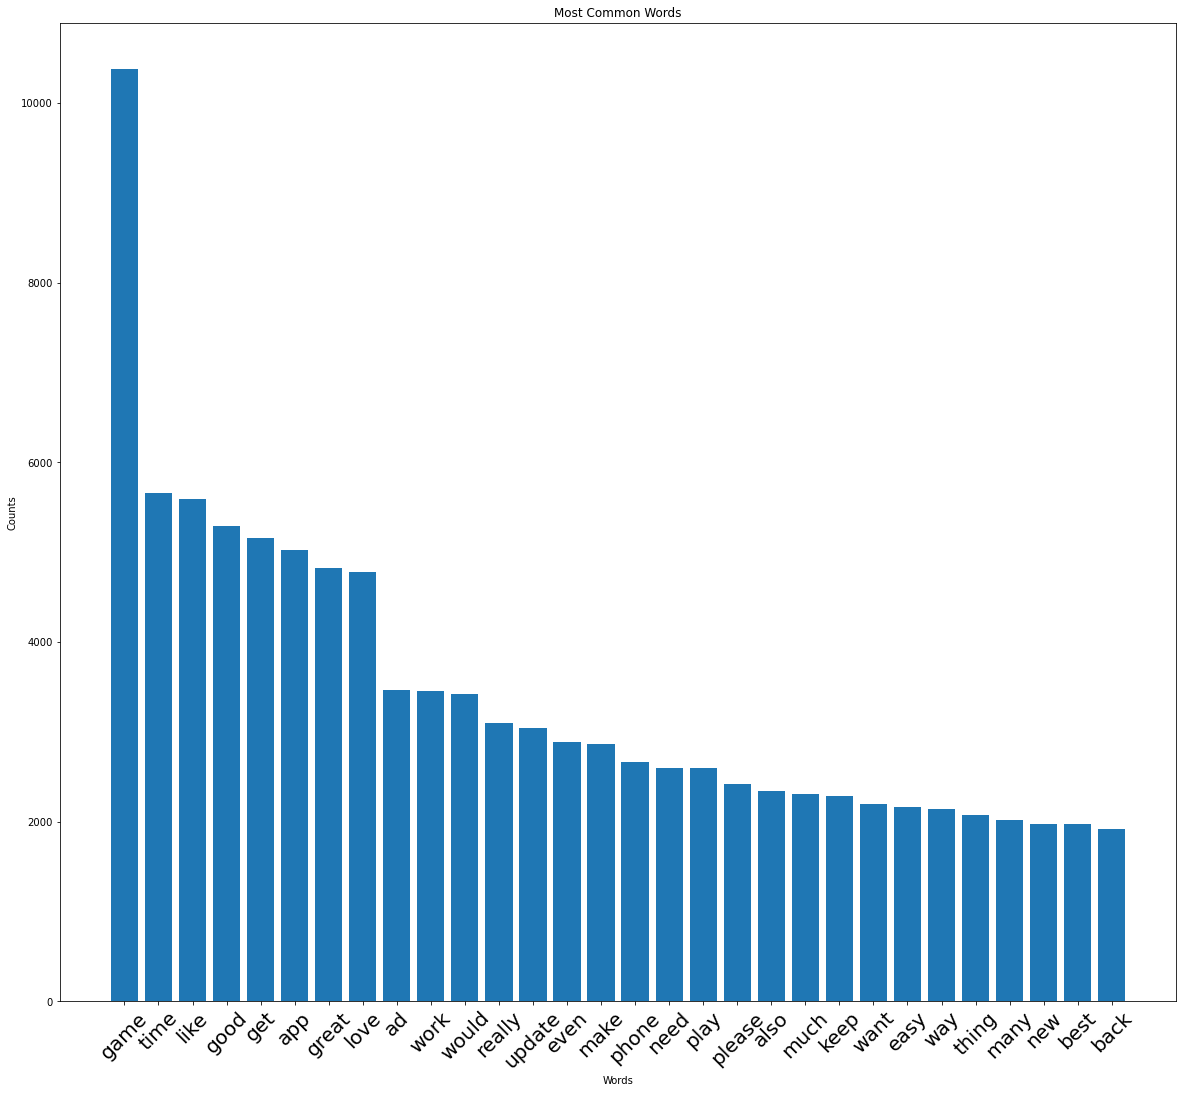

In [70]:
plt.figure(figsize=(20,18))
plt.bar(most_common_wordList[0:30], most_common_CountList[0:30])
# add labels and title to the plot
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Most Common Words')
plt.xticks(fontsize=20,rotation=45)
# show the plot
plt.show()

## Classification for Modelling

In [71]:
x=sparce_matrix
y=review.Sentiment.values

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [74]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10)
random.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [75]:
print("Accuracy: ",random.score(x_test,y_test))
y_pred = random.predict(x_test)
y_true = y_test

Accuracy:  0.878306171520171


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

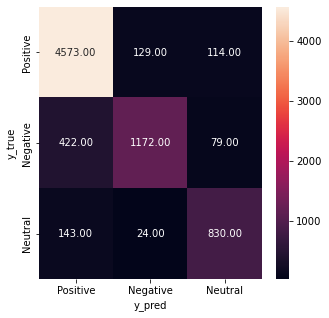

In [77]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
names = ['Positive', 'Negative', 'Neutral']
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = '0.2f')
plt.xlabel('y_pred')
plt.ylabel('y_true')
ax.set_xticklabels(names)
ax.set_yticklabels(names)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4816
           1       0.88      0.70      0.78      1673
           2       0.81      0.83      0.82       997

    accuracy                           0.88      7486
   macro avg       0.86      0.83      0.84      7486
weighted avg       0.88      0.88      0.88      7486

